In [ ]:
######################################
# 1 Gerekli kütüphanelerin yüklenmesi :
######################################
# Veri analizi ve manipülasyonu için pandas kütüphanesini kullanırız.
import pandas as pd
# .zip dosyaları ile işlem yapabilmek için zipfile kütüphanesi kullanırız.
import zipfile
# İnternet üzerinden veri çekmek veya göndermek gibi işlemler yapabilmek için request kütüphanesi kullanırız.
import requests
# Dosyalar üzerinde işlem yapabilmek için io kütüphanesi kullanırız.
import io
# Diziler ve matrisler üzerinde matematiksel işlem yapmak için numpy kütüphanesini kullanırız.
import numpy as np
# Verileri görselleştirmek ve grafikler oluşturmak için matplotlib kütüphanesini kullanırız.
import matplotlib.pyplot as plt
# Daha yüksek seviyede görselleştirme yapmak seaborn kütüphanesini kullanırız.
import seaborn as sns
# Hem denetimli hem de denetimsiz öğrenme algoritmalarını destekleyen scikit-learn, veri işleme ve modelleme süreçlerini kolaylaştırmak için kapsamlı araçlar sunan sklearn kütüphane kullanılır..
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from itertools import cycle

In [ ]:
column_names = [
  "label",
  "lepton_pT",
  "lepton_eta",
  "lepton_phi",
  "missing_energy",
  "missing_energy_phi",
  "jet_1_pt",
  "jet_1_eta",
  "jet_1_phi",
  "jet_1_btag",
  "jet_2_pt",
  "jet_2_eta",
  "jet_2_phi",
  "jet_2_btag",
  "jet_3_pt",
  "jet_3_eta",
  "jet_3_phi",
  "jet_3_btag",
  "jet_4_pt",
  "jet_4_eta",
  "jet_4_phi",
  "jet_4_btag",
  "DER_mass_MMC",
  "DER_mass_transverse_met_lep",
  "DER_mass_vis",
  "DER_pt_h",
  "DER_deltaeta_jet_jet",
  "DER_mass_jet_jet",
  "DER_prodeta_jet_jet"
]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# HIGGS veri setinin drive da olan ilk 100.000 satırını csv dosyasından çekeriz.
file_path = '/content/drive/MyDrive/UskudarUni/Makine Öğrenmesi/Final Ödev/HIGGS_ilk_100000.csv'
df = pd.read_csv(file_path, names=column_names)

# Data Frame içindeki ilk 5 satırı gösteririz.
df.head()

/tmp/ipython-input-73-100283648.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=column_names)


,label,lepton_pT,lepton_eta,lepton_phi,missing_energy,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,...,jet_4_eta,jet_4_phi,jet_4_btag,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [ ]:
# 100000 kayıt ile eğitim çok uzun sürdüğü için kayıt sayısını 15000 e düşürdüm.
df = df.head(15000)
df.head()

,label,lepton_pT,lepton_eta,lepton_phi,missing_energy,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,...,jet_4_eta,jet_4_phi,jet_4_btag,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [ ]:
# Yukarıdaki hatada gözüktüğü üzere jet_3_btag kolonunun string olan değer olduğu uyarısı vermiştir.
# jet_3_btag kolonunda string olan satırları sileriz.
df = df[pd.to_numeric(df['jet_3_btag'], errors='coerce').notnull()]

In [ ]:
# Yukarıdaki hatada gözüktüğü üzere jet_3_btag kolonunun tipinin karışık olduğunu tespit etmiş. Tüm kolonların tipini float olarak tanımlarız.
for col in df.columns:
    df[col] = df[col].astype(float)

In [ ]:
# HIGGS veri setini inceleriz. 1 Etiket 28 Özellik yer almaktadır. Etiket olarak 0: arka plan, 1: Higgs bozonu değerleri yer alır. Sonraki 28 özellikten ilk 21 tanesi doğrudan temel özellik, son 7 tanesi türetilmiş özellik olarak yer alır.
# Veri seti içinde 11 milyon kayıt bulunmaktadır. Ama biz 15.000 kayıt ile çalışacağız. Eksik veri bulunmamaktadır.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 1 to 14999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   label                        14999 non-null  float64
 1   lepton_pT                    14999 non-null  float64
 2   lepton_eta                   14999 non-null  float64
 3   lepton_phi                   14999 non-null  float64
 4   missing_energy               14999 non-null  float64
 5   missing_energy_phi           14999 non-null  float64
 6   jet_1_pt                     14999 non-null  float64
 7   jet_1_eta                    14999 non-null  float64
 8   jet_1_phi                    14999 non-null  float64
 9   jet_1_btag                   14999 non-null  float64
 10  jet_2_pt                     14999 non-null  float64
 11  jet_2_eta                    14999 non-null  float64
 12  jet_2_phi                    14999 non-null  float64
 13  jet_2_btag           

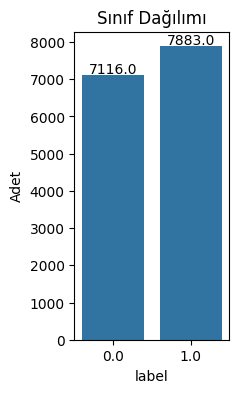

In [ ]:
# Etiket dağılımını kontrol ettiğimizde dengeli bir veri olduğunu görüyoruz.
plt.figure(figsize=(2, 4))
ax = sns.countplot(x='label', data=df)
plt.title('Sınıf Dağılımı')
plt.xlabel('label')
plt.ylabel('Adet')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 4), textcoords='offset points')

plt.show()

#################################################
# Bölüm 1: Veri Ön İşleme (Preprocessing)
#################################################

In [ ]:
# IQR yöntemi ile her bir özellik için aykırı değerleri kontrol ederiz.
# Yapılan kontrollerde lepton_pT, missing_energy, jet_1_pt, jet_1_eta, jet_2_pt, jet_2_eta, jet_3_pt, jet_4_pt, DER_mass_MMC, DER_mass_transverse_met_lep, DER_mass_vis, DER_pt_h, DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet adlı 15 kolonda aykırı değer tespit edilmiştir.
numeric_cols = df.select_dtypes(include=np.number).columns
iqr_results = []
for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

  iqr_results.append({
    "Sütun": col,
    "IQR": round(IQR, 2),
    "Alt Sınır": round(lower_bound, 2),
    "Üst Sınır": round(upper_bound, 2),
    "Aykırı Değer Sayısı": outliers.shape[0]
  })
iqr_df = pd.DataFrame(iqr_results)
iqr_df

,Sütun,IQR,Alt Sınır,Üst Sınır,Aykırı Değer Sayısı
0,label,1.00,-1.50,2.50,0
1,lepton_pT,0.65,-0.38,2.23,577
2,lepton_eta,1.46,-2.94,2.91,0
3,lepton_phi,1.74,-3.47,3.48,0
4,missing_energy,0.73,-0.52,2.39,424
5,missing_energy_phi,1.74,-3.50,3.48,0
6,jet_1_pt,0.49,-0.05,1.90,716
7,jet_1_eta,1.38,-2.77,2.76,106
8,jet_1_phi,1.76,-3.52,3.52,0
9,jet_1_btag,2.17,-3.26,5.43,0


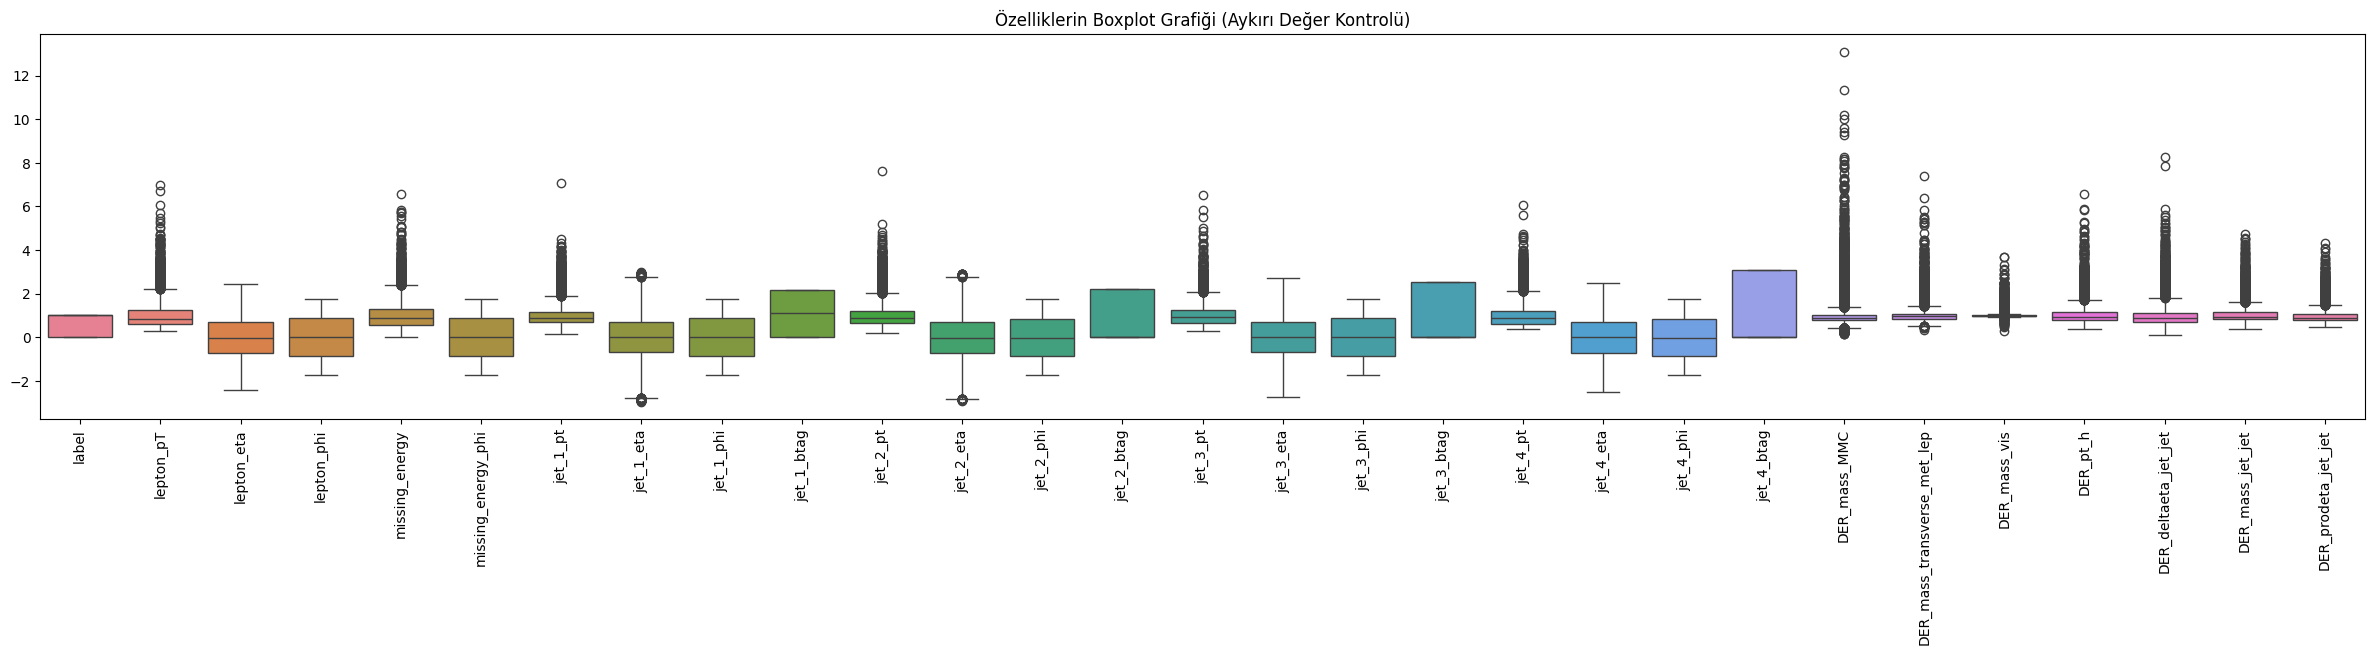

In [ ]:
# Aykırı değerler görselleştirilir.
plt.figure(figsize=(30, 5))
sns.boxplot(data=df[numeric_cols])
plt.title('Özelliklerin Boxplot Grafiği (Aykırı Değer Kontrolü)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Aykırı değerler Sınır değerler ile değiştirilir ve tekrar kontrol edilir.

for col in iqr_df[iqr_df['Aykırı Değer Sayısı'] > 0]['Sütun']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

iqr_results_after = []
for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

  iqr_results_after.append({
    "Sütun": col,
    "IQR": round(IQR, 2),
    "Alt Sınır": round(lower_bound, 2),
    "Üst Sınır": round(upper_bound, 2),
    "Aykırı Değer Sayısı (Sınırlandıktan Sonra)": outliers_after.shape[0]
  })
iqr_df_after = pd.DataFrame(iqr_results_after)
iqr_df_after

,Sütun,IQR,Alt Sınır,Üst Sınır,Aykırı Değer Sayısı (Sınırlandıktan Sonra)
0,label,1.00,-1.50,2.50,0
1,lepton_pT,0.65,-0.38,2.23,0
2,lepton_eta,1.46,-2.94,2.91,0
3,lepton_phi,1.74,-3.47,3.48,0
4,missing_energy,0.73,-0.52,2.39,0
5,missing_energy_phi,1.74,-3.50,3.48,0
6,jet_1_pt,0.49,-0.05,1.90,0
7,jet_1_eta,1.38,-2.77,2.76,0
8,jet_1_phi,1.76,-3.52,3.52,0
9,jet_1_btag,2.17,-3.26,5.43,0


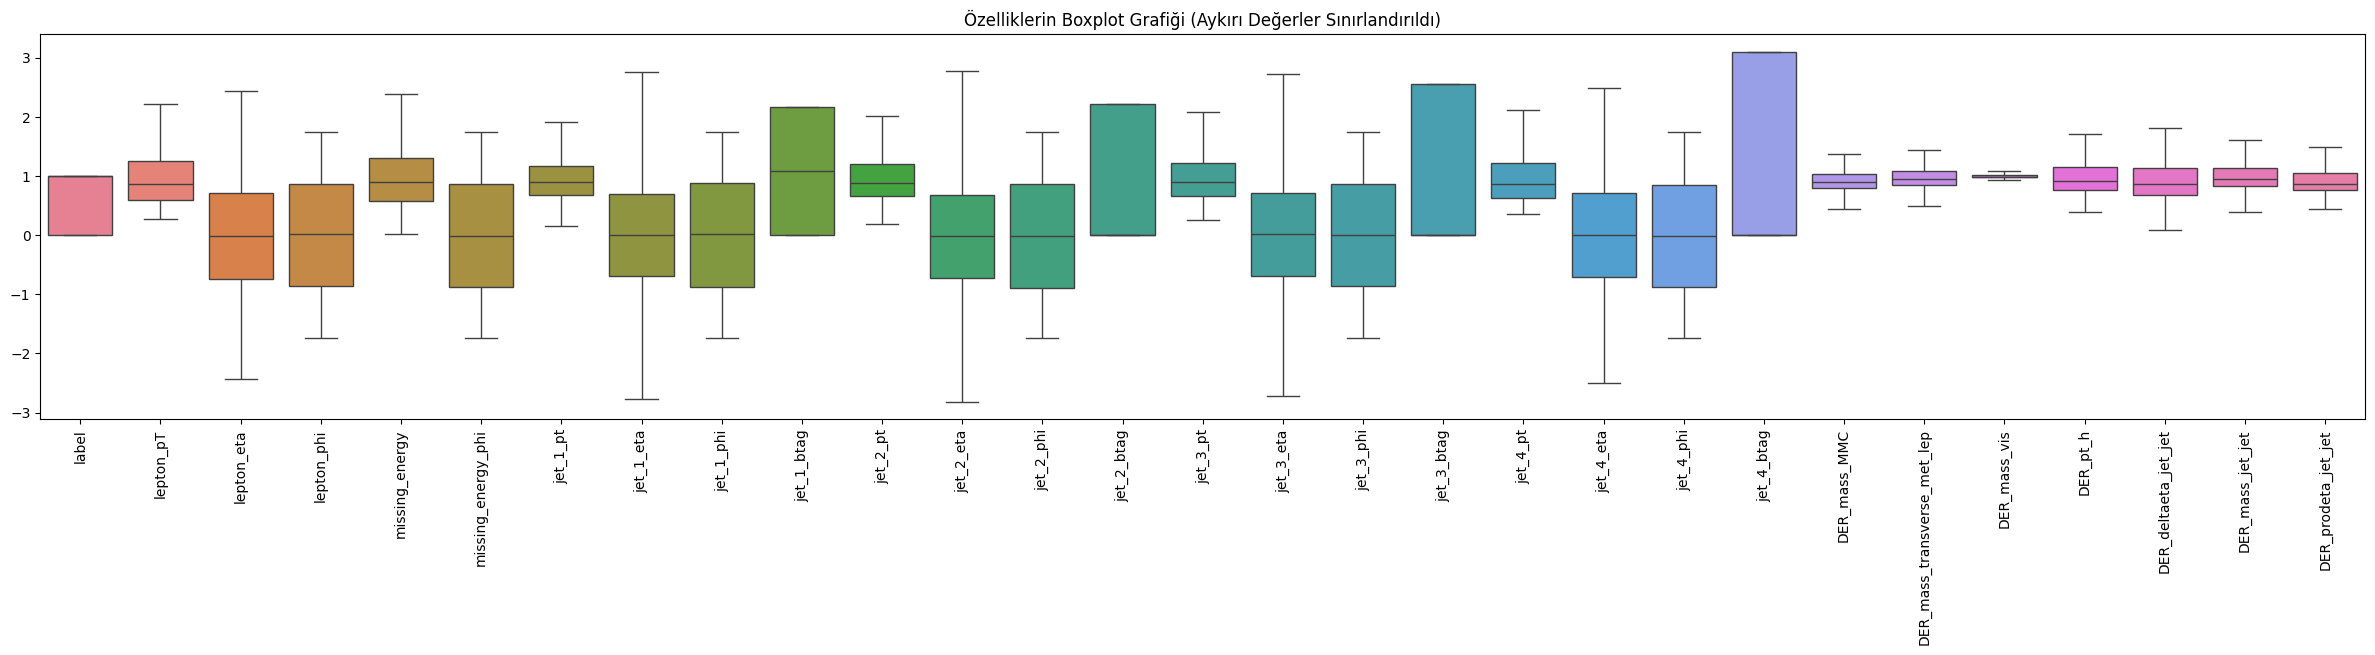

In [ ]:
# Aykırı değerler sınırlandırıldıktan sonra görselleştirilir.
plt.figure(figsize=(30, 5))
sns.boxplot(data=df[numeric_cols])
plt.title('Özelliklerin Boxplot Grafiği (Aykırı Değerler Sınırlandırıldı)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Feature ve Label ayrılır.
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
print("Özellikler (X):")
X.head()

Özellikler (X):


,lepton_pT,lepton_eta,lepton_phi,missing_energy,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_pt,...,jet_4_eta,jet_4_phi,jet_4_btag,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet
1,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,...,-1.138930,-0.000819,0.000000,0.438357,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.018863,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
5,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,0.755421,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [ ]:
print("\nEtiket (y):")
y.head()


Etiket (y):


,label
1,1.0
2,1.0
3,0.0
4,1.0
5,0.0


In [ ]:
# Tüm sayısal değişkenler MinMaxScaler ile [0, 1] aralığına dönüştürülerek ölçeklendirme yapılır.
numeric_cols = X.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
print("\nMinMaxScaler Uygulanmış Özellikler (X):")
X.head()


MinMaxScaler Uygulanmış Özellikler (X):


,lepton_pT,lepton_eta,lepton_phi,missing_energy,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_pt,...,jet_4_eta,jet_4_phi,jet_4_btag,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet
1,0.324418,0.567735,0.603005,0.624299,0.410359,0.536258,0.400134,0.043934,1.0,0.340424,...,0.271939,0.499747,0.0,0.000000,0.360225,0.374460,0.446804,0.402018,0.497206,0.338355
2,0.268675,0.802605,0.030563,0.185971,0.622211,0.541611,0.732513,0.896692,0.0,0.361834,...,0.726226,0.758326,0.0,0.500706,0.652382,0.374408,0.426659,0.415549,0.393056,0.320905
3,0.548423,0.319639,0.768393,0.831702,0.753235,0.931866,0.203354,0.229379,0.0,1.000000,...,0.364198,0.109693,0.0,0.539900,0.567874,0.463509,0.258793,0.453492,0.525528,0.491129
4,0.425676,0.566132,0.936646,0.366069,0.154423,0.299041,0.307469,0.235268,0.0,0.334022,...,0.425259,0.532413,0.0,0.337241,0.920600,0.380714,0.341431,0.605437,0.398263,0.348067
5,0.677365,0.374950,0.501925,0.758829,0.468038,0.394190,0.398524,0.953997,1.0,0.309170,...,0.369036,0.134369,1.0,0.409367,0.471814,0.278640,0.304623,0.201120,0.471671,0.491046


######################################################################
# Bölüm 2,3: Özellik Seçimi, Modelleme ve Değerlendirme
######################################################################

#### Flowchart A) İç döngüde farklı öznitelik seçim kombinasyonları denenerek en iyi model ve öznitelikler belirlenir. Figure 1

In [ ]:
# Veriyi Test ve Train olarak ayırıyoruz.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5-fold dış (model eğitimi/hiperparametre ayarlama) ve 3-fold iç (özellik seçimi) iç içe geçmiş çapraz doğrulama tanımlamaları yapılır.
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Değerlendirmeleri kaydedeceğimiz results oluşturulur.
results = []

#****************************************************
# Model Eğitimi ve Hiperparametre Ayarlama (KNN)
#****************************************************
print("\nKNN için Grid Search Çalışıyor...")
knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 7, 11]} # Denenecek n_neighbors değerleri tanımlanır.

# Model için dış çapraz doğrulama için hiperparametre optimizasyonu yaparız.
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=outer_cv, scoring='accuracy', n_jobs=-1, verbose=1)
knn_grid_search.fit(X_train, y_train)

# En iyi hiperparametre gösterilir.
best_knn = knn_grid_search.best_estimator_
print(f" En İyi Hiperparametreler (KNN) : {knn_grid_search.best_params_}")

#****************************************************
# Model Eğitimi ve Hiperparametre Ayarlama (SVM)
#****************************************************
print("\nSVM için Grid Search Çalışıyor...")
svm = SVC()
# predict_proba kullanabilmek için probability=True parametrelere eklenmiştir.
svm_param_grid = {'kernel': ['linear', 'rbf'],'C': [0.1, 1, 10], 'probability': [True]}

# Model için dış çapraz doğrulama için hiperparametre optimizasyonu yaparız.
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=outer_cv, scoring='accuracy', n_jobs=-1, verbose=1)
svm_grid_search.fit(X_train, y_train)

# En iyi hiperparametre gösterilir.
best_svm = svm_grid_search.best_estimator_
print(f" En İyi Hiperparametreler (SVM) : {svm_grid_search.best_params_}")

#****************************************************
# Model Eğitimi ve Hiperparametre Ayarlama (MLP)
#****************************************************
print("\nMLP için Grid Search Çalışıyor...")
mlp = MLPClassifier(max_iter=1000, early_stopping=True) # Model belirli bir noktadan sonra gelişmeyi durdurursa otomatik olarak durur.
mlp_param_grid = {'hidden_layer_sizes': [(50,), (100,)],
                  'activation': ['relu','tanh']}
# Model için dış çapraz doğrulama için hiperparametre optimizasyonu yaparız.
mlp_grid_search = GridSearchCV(estimator=mlp, param_grid=mlp_param_grid, cv=outer_cv, scoring='accuracy', n_jobs=-1, verbose=1)
mlp_grid_search.fit(X_train, y_train)

# En iyi hiperparametre gösterilir.
best_mlp = mlp_grid_search.best_estimator_
print(f" En İyi Hiperparametreler (MLP) : {mlp_grid_search.best_params_}")

#****************************************************
# Model Eğitimi ve Hiperparametre Ayarlama (XGBoost)
#****************************************************
print("\nXGBoost için Grid Search Çalışıyor...")
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_param_grid = {
    'n_estimators': [100, 200],  # Denenecek ağaç sayısı
    'learning_rate': [0.01, 0.1],  # Öğrenme oranı
    'max_depth': [3, 5]  # Ağaçların maksimum derinliği
}

# Model için dış çapraz doğrulama için hiperparametre optimizasyonu yaparız.
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=outer_cv, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train)

# En iyi hiperparametre gösterilir.
best_xgb = xgb_grid_search.best_estimator_
print(f" En İyi Hiperparametreler (XGBoost): {xgb_grid_search.best_params_}")

# 3 fold inner döngü çalışarak en iyi accuracy değerine göre özellik seçilir.
for fold_inner, (train_index_inner, test_index_inner) in enumerate(inner_cv.split(X_train, y_train)):
    print(f"\n  İç CV Fold {fold_inner+1}")

    # Veri Setini Eğitim ve Test olarak ayırırız.
    X_train_inner, X_test_inner = X.iloc[train_index_inner], X.iloc[test_index_inner]
    y_train_inner, y_test_inner = y.iloc[train_index_inner], y.iloc[test_index_inner]

    # Mutual Information ile En iyi 15 özelliği seçeriz.
    mi_scores = mutual_info_classif(X_train_inner, y_train_inner, random_state=42)
    mi_scores = pd.Series(mi_scores, name="MI_Scores", index=X_train_inner.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    top_15_selected_features = mi_scores.head(15).index.tolist()
    print(f"  Seçilen Özellikler : {top_15_selected_features}")
    X_train_inner_selected = X_train_inner[top_15_selected_features]
    X_test_inner_selected = X_test_inner[top_15_selected_features]

    # Daha önce tespit edilen en iyi hiper parametre ve ilgili fold için Seçilmiş özellikler ile (KNN) Modelimiz eğitilir.
    model_knn = KNeighborsClassifier(n_neighbors=knn_grid_search.best_params_['n_neighbors'])
    model_knn.fit(X_train_inner_selected, y_train_inner)

    # Test veri seti ile performans metrikleri hesaplanır.
    y_pred_knn_inner = model_knn.predict(X_test_inner_selected)
    knn_accuracy = accuracy_score(y_test_inner, y_pred_knn_inner)
    knn_precision = precision_score(y_test_inner, y_pred_knn_inner)
    knn_recall = recall_score(y_test_inner, y_pred_knn_inner)
    knn_f1 = f1_score(y_test_inner, y_pred_knn_inner)

    # Sonuçlar results eklenir.
    results.append({
        'İç Fold': fold_inner + 1,
        'Seçilen Özellikler': top_15_selected_features,
        'Model':'KNN',
        'En İyi HP': 'n_neighbors',
        'En İyi HP1': knn_grid_search.best_params_['n_neighbors'],
        'En İyi HP2': '',
        'En İyi HP3': '',
        'Accuracy': knn_accuracy,
        'Precision': knn_precision,
        'Recall': knn_recall,
        'F1-Score': knn_f1
    })

    # Daha önce tespit edilen en iyi hiper parametre ve ilgili fold için Seçilmiş özellikler ile (SVC) Modelimiz eğitilir.
    model_svm = SVC(kernel=svm_grid_search.best_params_['kernel'], C=svm_grid_search.best_params_['C'], probability=True)
    model_svm.fit(X_train_inner_selected, y_train_inner)

    # Test veri seti ile performans metrikleri hesaplanır.
    y_pred_svm_inner = model_svm.predict(X_test_inner_selected)
    svm_accuracy = accuracy_score(y_test_inner, y_pred_svm_inner)
    svm_precision = precision_score(y_test_inner, y_pred_svm_inner)
    svm_recall = recall_score(y_test_inner, y_pred_svm_inner)
    svm_f1 = f1_score(y_test_inner, y_pred_svm_inner)

    # Sonuçlar results eklenir.
    results.append({
        'İç Fold': fold_inner + 1,
        'Seçilen Özellikler': top_15_selected_features,
        'Model':'SVM',
        'En İyi HP': 'kernel, C',
        'En İyi HP1': svm_grid_search.best_params_['kernel'],
        'En İyi HP2': svm_grid_search.best_params_['C'],
        'En İyi HP3': '',
        'Accuracy': svm_accuracy,
        'Precision': svm_precision,
        'Recall': svm_recall,
        'F1-Score': svm_f1
    })

    # Daha önce tespit edilen en iyi hiper parametre ve ilgili fold için Seçilmiş özellikler ile (MLP) Modelimiz eğitilir.
    model_mlp = MLPClassifier(hidden_layer_sizes=mlp_grid_search.best_params_['hidden_layer_sizes'], activation=mlp_grid_search.best_params_['activation'], max_iter=1000, early_stopping=True) # Model belirli bir noktadan sonra gelişmeyi durdurursa otomatik olarak durur.
    model_mlp.fit(X_train_inner_selected, y_train_inner)

    # Test veri seti ile performans metrikleri hesaplanır.
    y_pred_mlp_inner = model_mlp.predict(X_test_inner_selected)
    mlp_accuracy = accuracy_score(y_test_inner, y_pred_mlp_inner)
    mlp_precision = precision_score(y_test_inner, y_pred_mlp_inner)
    mlp_recall = recall_score(y_test_inner, y_pred_mlp_inner)
    mlp_f1 = f1_score(y_test_inner, y_pred_mlp_inner)

    # Sonuçlar results eklenir.
    results.append({
        'İç Fold': fold_inner + 1,
        'Seçilen Özellikler': top_15_selected_features,
        'Model':'MLP',
        'En İyi HP': 'hidden_layer_sizes, activation',
        'En İyi HP1': mlp_grid_search.best_params_['hidden_layer_sizes'],
        'En İyi HP2': mlp_grid_search.best_params_['activation'],
        'En İyi HP3': '',
        'Accuracy': mlp_accuracy,
        'Precision': mlp_precision,
        'Recall': mlp_recall,
        'F1-Score': mlp_f1
    })

    # Daha önce tespit edilen en iyi hiper parametre ve ilgili fold için Seçilmiş özellikler ile (XGBoost) Modelimiz eğitilir.
    model_xgb = XGBClassifier(n_estimators=xgb_grid_search.best_params_['n_estimators'], learning_rate=xgb_grid_search.best_params_['learning_rate'], max_depth=xgb_grid_search.best_params_['max_depth'])
    model_xgb.fit(X_train_inner_selected, y_train_inner)

    # Test veri seti ile performans metrikleri hesaplanır.
    y_pred_xgb_inner = model_xgb.predict(X_test_inner_selected)
    xgb_accuracy = accuracy_score(y_test_inner, y_pred_xgb_inner)
    xgb_precision = precision_score(y_test_inner, y_pred_xgb_inner)
    xgb_recall = recall_score(y_test_inner, y_pred_xgb_inner)
    xgb_f1 = f1_score(y_test_inner, y_pred_xgb_inner)

    # Sonuçlar results eklenir.
    results.append({
        'İç Fold': fold_inner + 1,
        'Seçilen Özellikler': top_15_selected_features,
        'Model':'XGBoost',
        'En İyi HP': 'n_estimators, learning_rate, max_depth',
        'En İyi HP1': xgb_grid_search.best_params_['n_estimators'],
        'En İyi HP2': xgb_grid_search.best_params_['learning_rate'],
        'En İyi HP3': xgb_grid_search.best_params_['max_depth'],
        'Accuracy': xgb_accuracy,
        'Precision': xgb_precision,
        'Recall': xgb_recall,
        'F1-Score': xgb_f1
    })
    print("-" * 200)

# Tüm sonuçlar accurracy değerine göre sıralanarak gösterilir.
pd.set_option('display.max_colwidth', None)
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

# Elde edilen ilk sonuçlar doğrultusunda XGBoost tüm modeller arasında en iyi sonuçları vermiş. SVM ve MLP ortalama performans olarak birbirine yakın düzeyde sonuçlar üretmiş. KNN modelleri genellikle en düşük başarıya sahip olduğu gözükmektedir.
# Özellik seçimleri her fold için farklılık göstermiş ancak [DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet] gibi bazı özellikler tutarlı olarak yer almaktadır.
# Fold’lar arasında ortak çıkan önemli değişkenler: DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_pt_h, jet_1_pt, jet_4_pt, DER_mass_MMC, DER_mass_transverse_met_lep. Fiziksel olarak anlamlı değişkenlerin modellerde önemli bir rol oynadığını gösteriyor.

# XGBoost: 3. Fold ta en iyi F1-Skoru (0.7347) yakalamıştır. Yüksek doğruluk F1 ve dengeli precision/recall oranı gözükmektedir. Öğrenme oranı, derinlik ve ağaç sayısı kombinasyonu iyi optimize olmuş. (n_estimators=100, learning_rate=0.1, max_depth=5).
# Özellik mühendisliğiyle iyi çalışıyor gözükmektedir. Veri setinde açık ara en iyi performansı gösteren model XGBoost olmuştur.

# MLP: 3. Fold ta en iyi F1-Skoru (0.7176) yakalamıştır. SVM'ye benzer ya da biraz daha iyi performans göstermiştir. Bazı fold’larda SVM’yi geçiyor. Özellikle DER_mass_MMC, jet_4_eta, jet_4_btag gibi fiziksel anlamlı özellikler ile güçlü sonuçlar elde etmiş gözükmektedir.

# SVM: 3. Fold ta en iyi F1-Skoru (0.7216) yakalamıştır. MLP ile benzer performans göstermiştir.Bazı durumlarda daha yüksek recall ile öne çıkıyor. Daha küçük boyutlu ama karmaşık desenleri iyi ayırabilir.

# KNN: 3. Fold ta en iyi F1-Skoru (0.6691) yakalamıştır. En düşük performanslı model olarak gözükmektedir. Özellikle bu tip fiziksel ölçümlere dayanan büyük veri setlerinde KNN genellikle tercih edilmemesi gerektiğiğ gözükmektedir.


KNN için Grid Search Çalışıyor...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
 En İyi Hiperparametreler (KNN) : {'n_neighbors': 11}

SVM için Grid Search Çalışıyor...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
 En İyi Hiperparametreler (SVM) : {'C': 1, 'kernel': 'rbf', 'probability': True}

MLP için Grid Search Çalışıyor...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
 En İyi Hiperparametreler (MLP) : {'activation': 'relu', 'hidden_layer_sizes': (100,)}

XGBoost için Grid Search Çalışıyor...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
 En İyi Hiperparametreler (XGBoost): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

  İç CV Fold 1
  Seçilen Özellikler : ['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_pt_h', 'jet_1_pt', 'jet_1_btag', 'jet_4_pt', 'jet_1_eta', 'missing_energy_phi', 'jet_4_btag', 'jet_3_pt', 'DER_mass_MMC', 'jet_3_phi', 'missing_energy', 'jet_2_pt']
--------------------

,İç Fold,Seçilen Özellikler,Model,En İyi HP,En İyi HP1,En İyi HP2,En İyi HP3,Accuracy,Precision,Recall,F1-Score
11,3,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_mass_transverse_met_lep, jet_1_pt, DER_mass_MMC, DER_pt_h, jet_4_pt, missing_energy, lepton_pT, jet_4_eta, DER_mass_vis, jet_4_btag, jet_3_phi, jet_1_phi]",XGBoost,"n_estimators, learning_rate, max_depth",100,0.1,5,0.713178,0.719529,0.750473,0.734675
7,2,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, lepton_pT, jet_4_pt, DER_pt_h, DER_mass_transverse_met_lep, jet_1_pt, jet_4_btag, jet_4_eta, jet_3_btag, jet_4_phi, jet_2_phi, jet_2_eta, jet_2_pt]",XGBoost,"n_estimators, learning_rate, max_depth",100,0.1,5,0.701500,0.713950,0.722090,0.717997
3,1,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_pt_h, jet_1_pt, jet_1_btag, jet_4_pt, jet_1_eta, missing_energy_phi, jet_4_btag, jet_3_pt, DER_mass_MMC, jet_3_phi, missing_energy, jet_2_pt]",XGBoost,"n_estimators, learning_rate, max_depth",100,0.1,5,0.688250,0.702087,0.705098,0.703589
10,3,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_mass_transverse_met_lep, jet_1_pt, DER_mass_MMC, DER_pt_h, jet_4_pt, missing_energy, lepton_pT, jet_4_eta, DER_mass_vis, jet_4_btag, jet_3_phi, jet_1_phi]",MLP,"hidden_layer_sizes, activation","(100,)",relu,,0.688172,0.688995,0.748582,0.717554
9,3,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_mass_transverse_met_lep, jet_1_pt, DER_mass_MMC, DER_pt_h, jet_4_pt, missing_energy, lepton_pT, jet_4_eta, DER_mass_vis, jet_4_btag, jet_3_phi, jet_1_phi]",SVM,"kernel, C",rbf,1,,0.683671,0.675319,0.774575,0.721550
5,2,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, lepton_pT, jet_4_pt, DER_pt_h, DER_mass_transverse_met_lep, jet_1_pt, jet_4_btag, jet_4_eta, jet_3_btag, jet_4_phi, jet_2_phi, jet_2_eta, jet_2_pt]",SVM,"kernel, C",rbf,1,,0.683000,0.675914,0.763895,0.717217
6,2,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, lepton_pT, jet_4_pt, DER_pt_h, DER_mass_transverse_met_lep, jet_1_pt, jet_4_btag, jet_4_eta, jet_3_btag, jet_4_phi, jet_2_phi, jet_2_eta, jet_2_pt]",MLP,"hidden_layer_sizes, activation","(100,)",relu,,0.673250,0.661277,0.777197,0.714566
1,1,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_pt_h, jet_1_pt, jet_1_btag, jet_4_pt, jet_1_eta, missing_energy_phi, jet_4_btag, jet_3_pt, DER_mass_MMC, jet_3_phi, missing_energy, jet_2_pt]",SVM,"kernel, C",rbf,1,,0.672500,0.662815,0.765126,0.710305
2,1,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_pt_h, jet_1_pt, jet_1_btag, jet_4_pt, jet_1_eta, missing_energy_phi, jet_4_btag, jet_3_pt, DER_mass_MMC, jet_3_phi, missing_energy, jet_2_pt]",MLP,"hidden_layer_sizes, activation","(100,)",relu,,0.663000,0.667709,0.712244,0.689258
0,1,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_pt_h, jet_1_pt, jet_1_btag, jet_4_pt, jet_1_eta, missing_energy_phi, jet_4_btag, jet_3_pt, DER_mass_MMC, jet_3_phi, missing_energy, jet_2_pt]",KNN,n_neighbors,11,,,0.621750,0.618432,0.728919,0.669145



Test set üzerinde KNN değerlendiriliyor...
Özellikler: ['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_pt_h', 'jet_1_pt', 'jet_1_btag', 'jet_4_pt', 'jet_1_eta', 'missing_energy_phi', 'jet_4_btag', 'jet_3_pt', 'DER_mass_MMC', 'jet_3_phi', 'missing_energy', 'jet_2_pt']

Test set üzerinde SVM değerlendiriliyor...
Özellikler: ['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_mass_transverse_met_lep', 'jet_1_pt', 'DER_mass_MMC', 'DER_pt_h', 'jet_4_pt', 'missing_energy', 'lepton_pT', 'jet_4_eta', 'DER_mass_vis', 'jet_4_btag', 'jet_3_phi', 'jet_1_phi']

Test set üzerinde MLP değerlendiriliyor...
Özellikler: ['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_mass_transverse_met_lep', 'jet_1_pt', 'DER_mass_MMC', 'DER_pt_h', 'jet_4_pt', 'missing_energy', 'lepton_pT', 'jet_4_eta', 'DER_mass_vis', 'jet_4_btag', 'jet_3_phi', 'jet_1_phi']

Test set üzerinde XGBoost değerlendiriliyor...
Özellikler: ['DER_deltaeta_jet_jet', 'DER_ma

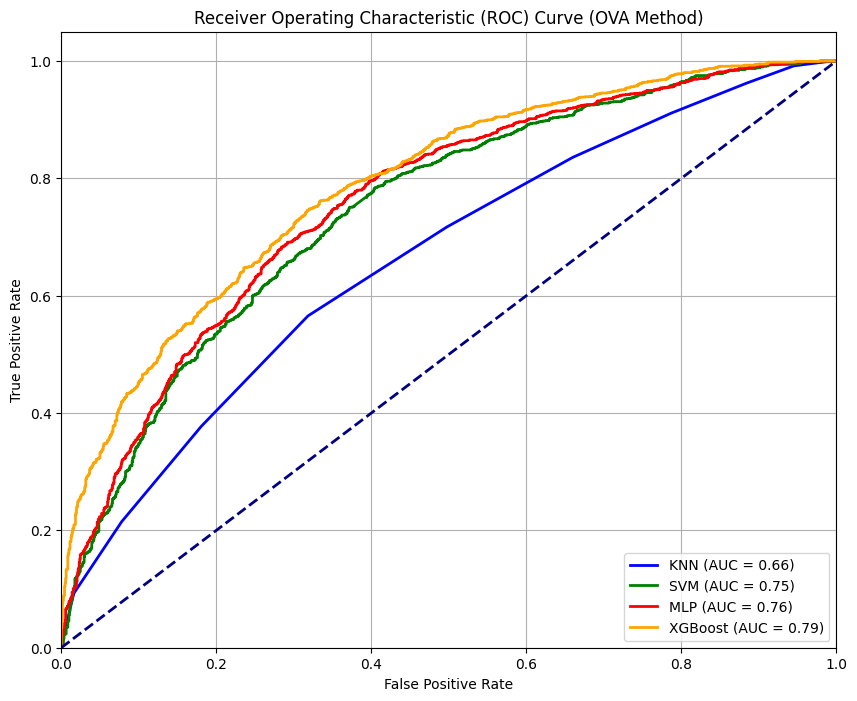


Test Set Performans Sonuçları:


,Model,Seçilen Özellikler,Accuracy,Precision,Recall,F1-Score
3,XGBoost,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_mass_transverse_met_lep, jet_1_pt, DER_mass_MMC, DER_pt_h, jet_4_pt, missing_energy, lepton_pT, jet_4_eta, DER_mass_vis, jet_4_btag, jet_3_phi, jet_1_phi]",0.714667,0.719951,0.748256,0.733831
2,MLP,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_mass_transverse_met_lep, jet_1_pt, DER_mass_MMC, DER_pt_h, jet_4_pt, missing_energy, lepton_pT, jet_4_eta, DER_mass_vis, jet_4_btag, jet_3_phi, jet_1_phi]",0.702000,0.697971,0.763475,0.729255
1,SVM,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_mass_transverse_met_lep, jet_1_pt, DER_mass_MMC, DER_pt_h, jet_4_pt, missing_energy, lepton_pT, jet_4_eta, DER_mass_vis, jet_4_btag, jet_3_phi, jet_1_phi]",0.693667,0.682171,0.781230,0.728348
0,KNN,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_pt_h, jet_1_pt, jet_1_btag, jet_4_pt, jet_1_eta, missing_energy_phi, jet_4_btag, jet_3_pt, DER_mass_MMC, jet_3_phi, missing_energy, jet_2_pt]",0.615333,0.615008,0.717185,0.662178


In [ ]:
# Modeller ve En iyi hiperparametreleri değişken olarak tanımlanır.
models_and_params = {
    'KNN': {'model': KNeighborsClassifier, 'params': {'n_neighbors': knn_grid_search.best_params_['n_neighbors']}},
    'SVM': {'model': SVC, 'params': {'kernel': svm_grid_search.best_params_['kernel'], 'C': svm_grid_search.best_params_['C'], 'probability': True}},
    'MLP': {'model': MLPClassifier, 'params': {'hidden_layer_sizes': mlp_grid_search.best_params_['hidden_layer_sizes'], 'activation': mlp_grid_search.best_params_['activation'], 'max_iter': 1000, 'early_stopping':True}},
    'XGBoost': {'model': XGBClassifier, 'params': {'n_estimators': xgb_grid_search.best_params_['n_estimators'], 'learning_rate': xgb_grid_search.best_params_['learning_rate'], 'max_depth': xgb_grid_search.best_params_['max_depth'], 'eval_metric': 'logloss', 'random_state': 42}}
}

# Test sonuçlarını tutacak değişken tanımlanır.
test_results = []

# ROC eğrisi çizmek için tanımlama yapılır.
plt.figure(figsize=(10, 8))

# ROC eğrisinde her bir modeli farklı renkte göstermek için renk tanımlaması yapılır.
colors = cycle(['blue', 'green', 'red', 'orange', 'purple', 'brown'])

# Accuracy değerine göre seçilen en iyi özellikler ile modeller en iyi hiper parametreleri kullanılarak test verisi ile değerlendirme yapılır.
for model_name, model_info in models_and_params.items():
  print(f"\nTest set üzerinde {model_name} değerlendiriliyor...")

  # Sonuç içinden ilgili modelin seçilen en iyi özellikleri çekilir.
  so_results_df = pd.DataFrame(results)[pd.DataFrame(results)['Model'] == model_name]
  best_knn_result = so_results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
  top_15_selected_features_final = best_knn_result['Seçilen Özellikler']
  print(f"Özellikler: {top_15_selected_features_final}")
  X_train_final_selected = X_train[top_15_selected_features_final]
  X_test_final_selected = X_test[top_15_selected_features_final]

  # Her bir modeli seçilen en iyi hiperparametreleri ve özellikler ile tekrar eğitilir.
  model = model_info['model'](**model_info['params'])
  model.fit(X_train_final_selected, y_train)

  # Eğitilen model test verisi ile tahmin yaptırılırarak Performans metrikleri hesaplanır.
  y_pred_test = model.predict(X_test_final_selected)
  test_accuracy = accuracy_score(y_test, y_pred_test)
  test_precision = precision_score(y_test, y_pred_test)
  test_recall = recall_score(y_test, y_pred_test)
  test_f1 = f1_score(y_test, y_pred_test)

  # Sonuçlar kaydedilir.
  test_results.append({
      'Model': model_name,
      'Seçilen Özellikler': top_15_selected_features_final,
      'Accuracy': test_accuracy,
      'Precision': test_precision,
      'Recall': test_recall,
      'F1-Score': test_f1
  })

  y_prob = model.predict_proba(X_test_final_selected)[:, 1]

  # ROC eğrilerini hesapla
  fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob)
  roc_auc_knn = auc(fpr_knn, tpr_knn)

  # ROC eğrilerini çizdir
  color = next(colors)
  plt.plot(fpr_knn, tpr_knn, color=color, lw=2, label=model_name+' (AUC = %0.2f)' % roc_auc_knn)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (OVA Method)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Tüm sonuçlar accurracy değerine göre sıralanarak gösterilir.
pd.set_option('display.max_colwidth', None)
test_results_df = pd.DataFrame(test_results)
print("\nTest Set Performans Sonuçları:")
test_results_df.sort_values(by='Accuracy', ascending=False)

# XGBoost: Genelleme performansı en yüksek model. En yüksek accuracy (0.7147) ve F1-Score (0.7338) değerine sahip olmuştur. Precision ve Recall dengesi çok iyi gözükmektedir. Özellik seçimi hem fiziksel olarak anlamlı hem de tutarlı. Hem iç çapraz doğrulama hem de dış testte en iyi sonuçları veren modeldir. Genelleme kabiliyeti yüksek ve overfitting eğilimi düşük gözükmektedir.

# MLP: Recall değeri çok yüksek (0.7635) olması ile pozitif sınıfları çok iyi yakaladığı gözükmektedir. Precision XGBoost’a göre biraz düşük kalmıştır. F1-Score oldukça iyi ve SVM’ye çok yakın gözükmektedir. Özellikle duyarlılığın (recall) önemli olduğu durumlarda tercih edilebilir.

# SVM: En yüksek recall (0.7812) değeriyle öne çıkıyor. Fakat precision düşük kaldığı için false positive oranı yüksek olabilir. Accuracy de MLP ve XGBoost’un gerisinde kalmıştır.

# KNN: Tüm metriklerde en düşük performans. Accuracy ve Precision özellikle düşük kalmıştır. Recall fena değil ama genel olarak yetersiz gözükmektedir. Veri setinde KNN modeli yüksek boyut ve karmaşıklık nedeniyle başarısız olmuştur. Özellikle HIGGS gibi fiziksel değişkenlerin çok olduğu veri setlerinde iyi olmadığı gözükmektedir.

# ROC Eğrisi: ROC eğrisi, bir modelin True Positive Rate (TPR) ve False Positive Rate (FPR) arasındaki ilişkiyi farklı eşik değerlerinde gösterir. Eğri ne kadar sol üst köşeye yakınsa, model o kadar iyi sınıflandırma yapıyor demektir.
# AUC (Area Under Curve) değeri modelin ayrım yapma gücünü göstermektedir. 1.0: Mükemmel sınıflandırıcı, 0.5: Rastgele tahmin, <0.5: Kötü tahmin
# XGBoost, En yüksek AUC’ye sahip olmuştur. Sınıfları ayırt etme başarısı çok yüksek. XGBoost eğrisi diğerlerine göre daha yukarıda ve sola yakın ilerliyor. Hem düşük false positive üretip hem de yüksek true positive oranı yakaladığını gösteriyor.
# MLP, Derin öğrenme tabanlı model olarak güçlü ayrım gücü gösteriyor. XGBoost’a yakın. MLP ve SVM eğrileri neredeyse iç içe geçmiş. İki modelin ayrım başarımı birbirine çok yakın gözükmektedir.
# SVM, MLP’ye çok yakın gözükmektedir. Özellikle yüksek recall başarısıyla destekleniyor.
# KNN, En düşük AUC. Düşük ayrım kabiliyeti ile zayıf genel performans göstermiştir. KNN eğrisi, diagonalin çok az üstünde ve diğerlerinden bariz şekilde daha aşağıda gözükmektedir. Modelin test verisinde zayıf kaldığı açıkça görülüyor.


######################################################################
# Bölüm 2,3: Özellik Seçimi, Modelleme ve Değerlendirme
######################################################################

#### Flowchart B) İç döngüde farklı hiperparametre kombinasyonları denenerek en iyi model ve hiperparametreler belirlenir. Figure2

Dış CV Fold 1
Seçilen Özellikler : ['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'jet_1_pt', 'DER_prodeta_jet_jet', 'lepton_pT', 'DER_mass_transverse_met_lep', 'jet_4_btag', 'jet_1_btag', 'missing_energy', 'lepton_eta', 'DER_mass_MMC', 'DER_pt_h', 'jet_4_pt', 'jet_3_phi', 'jet_4_eta']

KNN için Grid Search Çalışıyor...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
En İyi Hiperparametreler (KNN) : {'n_neighbors': 11}

SVM için Grid Search Çalışıyor...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
En İyi Hiperparametreler (SVM) : {'C': 1, 'kernel': 'rbf', 'probability': True}

MLP için Grid Search Çalışıyor...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
En İyi Hiperparametreler (MLP) : {'activation': 'relu', 'hidden_layer_sizes': (50,)}

XGBoost için Grid Search Çalışıyor...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


En İyi Hiperparametreler (XGBoost): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}




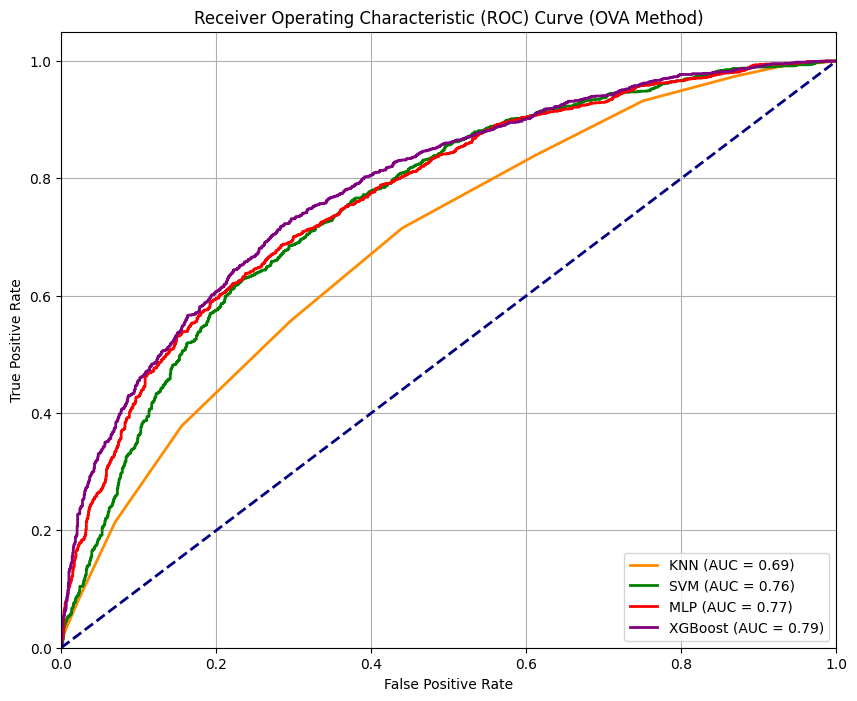

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Dış CV Fold 2
Seçilen Özellikler : ['DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet', 'DER_mass_jet_jet', 'jet_1_pt', 'DER_mass_transverse_met_lep', 'DER_pt_h', 'jet_4_phi', 'jet_3_btag', 'lepton_pT', 'lepton_phi', 'lepton_eta', 'jet_4_btag', 'jet_4_eta', 'jet_3_phi', 'missing_energy']

KNN için Grid Search Çalışıyor...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
En İyi Hiperparametreler (KNN) : {'n_neighbors': 11}

SVM için Grid Search Çalışıyor...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
En İyi Hiperparametreler (SVM) : {'C': 1, 'kernel': 'rbf', 'probability': True}

MLP için Grid Search Çalışıyor...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
En İyi Hiperparametreler (MLP) : {'activation': 'relu', 'hidden_layer_sizes': (50,)}

XGBoost için

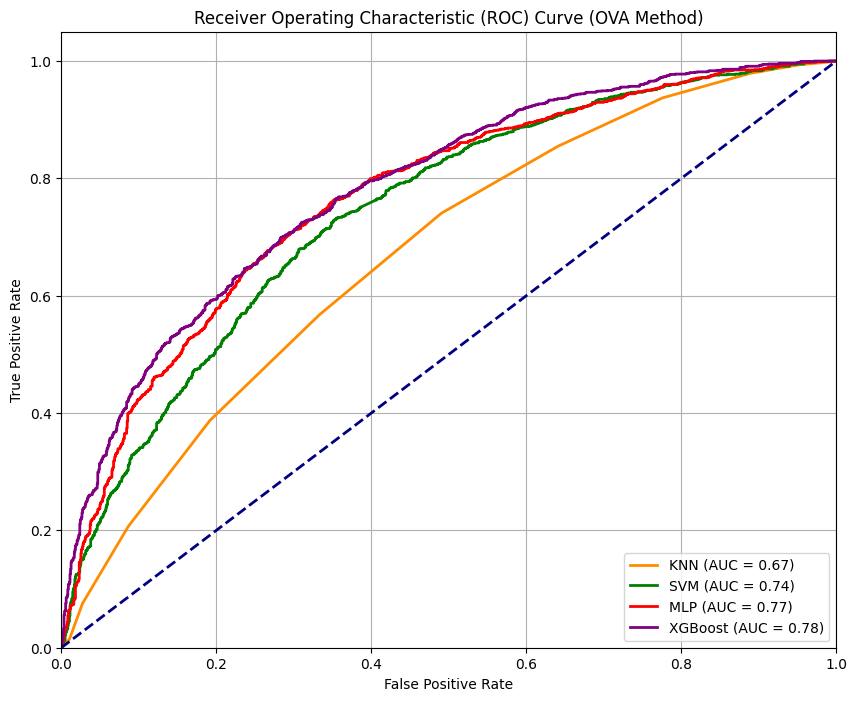

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Dış CV Fold 3
Seçilen Özellikler : ['DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet', 'DER_mass_jet_jet', 'DER_mass_transverse_met_lep', 'lepton_pT', 'jet_1_pt', 'missing_energy', 'jet_3_phi', 'jet_4_pt', 'jet_1_eta', 'jet_1_phi', 'DER_mass_MMC', 'lepton_eta', 'jet_2_btag', 'lepton_phi']

KNN için Grid Search Çalışıyor...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
En İyi Hiperparametreler (KNN) : {'n_neighbors': 11}

SVM için Grid Search Çalışıyor...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


En İyi Hiperparametreler (SVM) : {'C': 1, 'kernel': 'rbf', 'probability': True}

MLP için Grid Search Çalışıyor...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
En İyi Hiperparametreler (MLP) : {'activation': 'relu', 'hidden_layer_sizes': (100,)}

XGBoost için Grid Search Çalışıyor...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
En İyi Hiperparametreler (XGBoost): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}




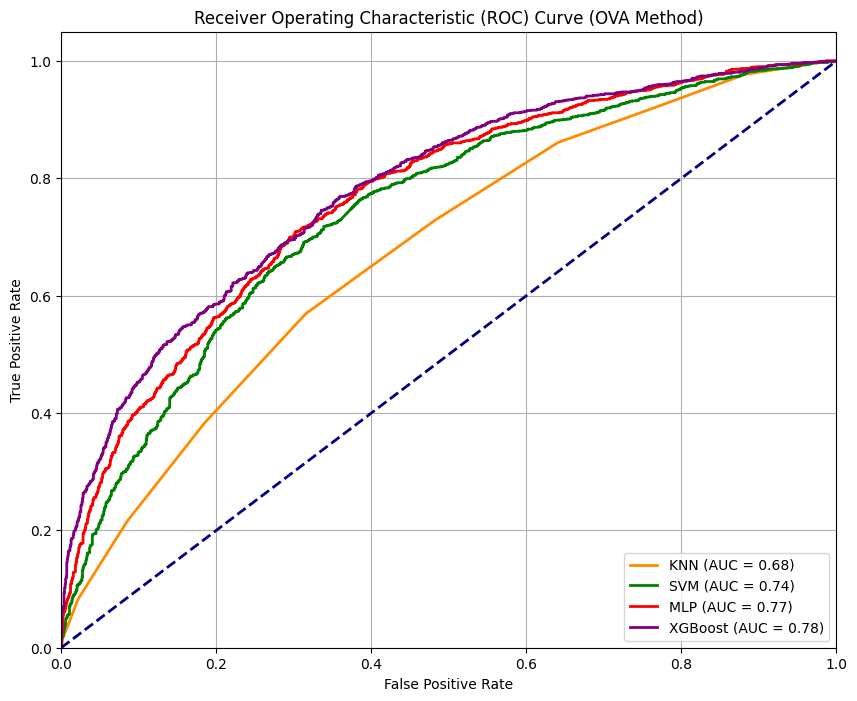

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Dış CV Fold 4
Seçilen Özellikler : ['DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet', 'DER_mass_jet_jet', 'jet_1_pt', 'lepton_pT', 'jet_3_pt', 'DER_pt_h', 'DER_mass_transverse_met_lep', 'DER_mass_MMC', 'jet_4_btag', 'lepton_phi', 'jet_3_btag', 'jet_4_pt', 'lepton_eta', 'jet_2_pt']

KNN için Grid Search Çalışıyor...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
En İyi Hiperparametreler (KNN) : {'n_neighbors': 11}

SVM için Grid Search Çalışıyor...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
En İyi Hiperparametreler (SVM) : {'C': 1, 'kernel': 'rbf', 'probability': True}

MLP için Grid Search Çalışıyor...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
En İyi Hiperparametreler (MLP) : {'activation': 'relu', 'hidden_layer_sizes': (50,)}

XGBoost için Grid

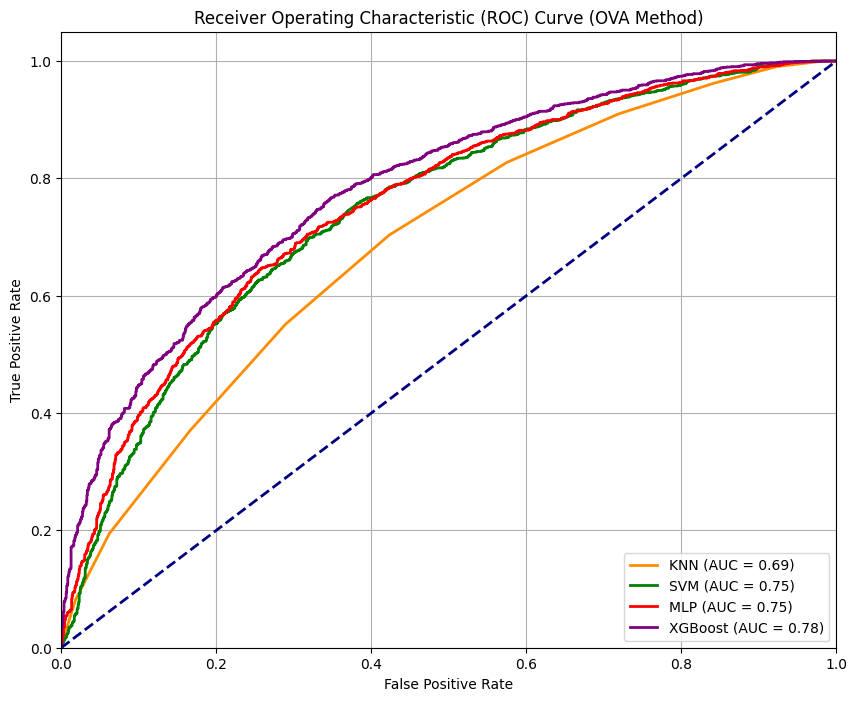

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Dış CV Fold 5
Seçilen Özellikler : ['DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet', 'DER_mass_jet_jet', 'jet_1_pt', 'lepton_pT', 'DER_pt_h', 'jet_2_btag', 'jet_3_btag', 'DER_mass_transverse_met_lep', 'lepton_eta', 'missing_energy', 'jet_1_btag', 'jet_4_pt', 'jet_4_btag', 'jet_3_phi']

KNN için Grid Search Çalışıyor...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
En İyi Hiperparametreler (KNN) : {'n_neighbors': 11}

SVM için Grid Search Çalışıyor...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
En İyi Hiperparametreler (SVM) : {'C': 10, 'kernel': 'rbf', 'probability': True}

MLP için Grid Search Çalışıyor...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
En İyi Hiperparametreler (MLP) : {'activation': 'relu', 'hidden_layer_sizes': (100,)}

XGBoost iç

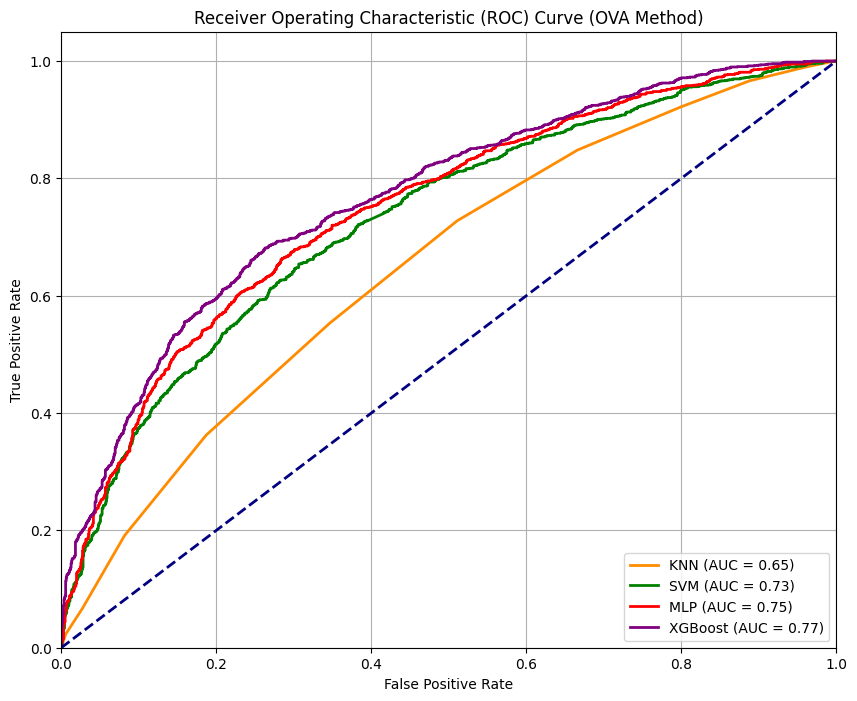

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Dış Fold,Seçilen Özellikler,Model,En İyi HP,En İyi HP1,En İyi HP2,En İyi HP3,Accuracy,Precision,Recall,F1-Score
3,1,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, jet_1_pt, DER_prodeta_jet_jet, lepton_pT, DER_mass_transverse_met_lep, jet_4_btag, jet_1_btag, missing_energy, lepton_eta, DER_mass_MMC, DER_pt_h, jet_4_pt, jet_3_phi, jet_4_eta]",XGBoost,"n_estimators, learning_rate, max_depth",200,0.1,3,0.716333,0.728878,0.733037,0.730952
15,4,"[DER_deltaeta_jet_jet, DER_prodeta_jet_jet, DER_mass_jet_jet, jet_1_pt, lepton_pT, jet_3_pt, DER_pt_h, DER_mass_transverse_met_lep, DER_mass_MMC, jet_4_btag, lepton_phi, jet_3_btag, jet_4_pt, lepton_eta, jet_2_pt]",XGBoost,"n_estimators, learning_rate, max_depth",100,0.1,5,0.709000,0.714722,0.742386,0.728291
7,2,"[DER_deltaeta_jet_jet, DER_prodeta_jet_jet, DER_mass_jet_jet, jet_1_pt, DER_mass_transverse_met_lep, DER_pt_h, jet_4_phi, jet_3_btag, lepton_pT, lepton_phi, lepton_eta, jet_4_btag, jet_4_eta, jet_3_phi, missing_energy]",XGBoost,"n_estimators, learning_rate, max_depth",200,0.1,3,0.706333,0.717228,0.728599,0.722869
6,2,"[DER_deltaeta_jet_jet, DER_prodeta_jet_jet, DER_mass_jet_jet, jet_1_pt, DER_mass_transverse_met_lep, DER_pt_h, jet_4_phi, jet_3_btag, lepton_pT, lepton_phi, lepton_eta, jet_4_btag, jet_4_eta, jet_3_phi, missing_energy]",MLP,"hidden_layer_sizes, activation","(50,)",relu,,0.705000,0.712531,0.735574,0.723869
11,3,"[DER_deltaeta_jet_jet, DER_prodeta_jet_jet, DER_mass_jet_jet, DER_mass_transverse_met_lep, lepton_pT, jet_1_pt, missing_energy, jet_3_phi, jet_4_pt, jet_1_eta, jet_1_phi, DER_mass_MMC, lepton_eta, jet_2_btag, lepton_phi]",XGBoost,"n_estimators, learning_rate, max_depth",100,0.1,5,0.699333,0.712131,0.718453,0.715278
1,1,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, jet_1_pt, DER_prodeta_jet_jet, lepton_pT, DER_mass_transverse_met_lep, jet_4_btag, jet_1_btag, missing_energy, lepton_eta, DER_mass_MMC, DER_pt_h, jet_4_pt, jet_3_phi, jet_4_eta]",SVM,"kernel, C",rbf,1,,0.697000,0.691076,0.766011,0.726617
2,1,"[DER_deltaeta_jet_jet, DER_mass_jet_jet, jet_1_pt, DER_prodeta_jet_jet, lepton_pT, DER_mass_transverse_met_lep, jet_4_btag, jet_1_btag, missing_energy, lepton_eta, DER_mass_MMC, DER_pt_h, jet_4_pt, jet_3_phi, jet_4_eta]",MLP,"hidden_layer_sizes, activation","(50,)",relu,,0.694333,0.699758,0.733037,0.716011
10,3,"[DER_deltaeta_jet_jet, DER_prodeta_jet_jet, DER_mass_jet_jet, DER_mass_transverse_met_lep, lepton_pT, jet_1_pt, missing_energy, jet_3_phi, jet_4_pt, jet_1_eta, jet_1_phi, DER_mass_MMC, lepton_eta, jet_2_btag, lepton_phi]",MLP,"hidden_layer_sizes, activation","(100,)",relu,,0.694000,0.673148,0.812302,0.736207
19,5,"[DER_deltaeta_jet_jet, DER_prodeta_jet_jet, DER_mass_jet_jet, jet_1_pt, lepton_pT, DER_pt_h, jet_2_btag, jet_3_btag, DER_mass_transverse_met_lep, lepton_eta, missing_energy, jet_1_btag, jet_4_pt, jet_4_btag, jet_3_phi]",XGBoost,"n_estimators, learning_rate, max_depth",200,0.1,3,0.693565,0.706215,0.713832,0.710003
9,3,"[DER_deltaeta_jet_jet, DER_prodeta_jet_jet, DER_mass_jet_jet, DER_mass_transverse_met_lep, lepton_pT, jet_1_pt, missing_energy, jet_3_phi, jet_4_pt, jet_1_eta, jet_1_phi, DER_mass_MMC, lepton_eta, jet_2_btag, lepton_phi]",SVM,"kernel, C",rbf,1,,0.692000,0.687536,0.759036,0.721519


In [ ]:
# 5-fold dış (özellik seçimi) ve 3-fold iç (model eğitimi/hiperparametre ayarlama) iç içe geçmiş çapraz doğrulama tanımlamaları yapılır.
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Değerlendirmeleri kaydedeceğimiz results oluşturulur.
results = []

for fold_outer, (train_index_outer, test_index_outer) in enumerate(outer_cv.split(X, y)):
  print(f"Dış CV Fold {fold_outer+1}")

  # Veri Setini Eğitim ve Test olarak ayırırız.
  X_train_outer, X_test_outer = X.iloc[train_index_outer], X.iloc[test_index_outer]
  y_train_outer, y_test_outer = y.iloc[train_index_outer], y.iloc[test_index_outer]

  # Mutual Information ile En iyi 15 özelliği seçeriz.
  mi_scores = mutual_info_classif(X_train_outer, y_train_outer, random_state=42)
  mi_scores = pd.Series(mi_scores, name="MI_Scores", index=X_train_outer.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  top_15_selected_features = mi_scores.head(15).index.tolist()
  print(f"Seçilen Özellikler : {top_15_selected_features}")
  X_train_outer_selected = X_train_outer[top_15_selected_features]
  X_test_outer_selected = X_test_outer[top_15_selected_features]

  #****************************************************
  # Model Eğitimi ve Hiperparametre Ayarlama (KNN)
  #****************************************************
  print("\nKNN için Grid Search Çalışıyor...")
  knn = KNeighborsClassifier()
  knn_param_grid = {'n_neighbors': [3, 7, 11]} # Denenecek n_neighbors değerleri tanımlanır.

  # Model için iç çapraz doğrulama için hiperparametre optimizasyonu yaparız.
  knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1, verbose=1)
  knn_grid_search.fit(X_train_outer_selected, y_train_outer)

  # En iyi hiperparametre gösterilir.
  best_knn = knn_grid_search.best_estimator_
  print(f"En İyi Hiperparametreler (KNN) : {knn_grid_search.best_params_}")

  # Test veri seti ile performans metrikleri hesaplanır.
  y_pred_knn_outer = best_knn.predict(X_test_outer_selected)
  knn_accuracy = accuracy_score(y_test_outer, y_pred_knn_outer)
  knn_precision = precision_score(y_test_outer, y_pred_knn_outer)
  knn_recall = recall_score(y_test_outer, y_pred_knn_outer)
  knn_f1 = f1_score(y_test_outer, y_pred_knn_outer)

  # Sonuçlar results eklenir.
  results.append({
      'Dış Fold': fold_outer + 1,
      'Seçilen Özellikler': top_15_selected_features,
      'Model':'KNN',
      'En İyi HP': 'n_neighbors',
      'En İyi HP1': knn_grid_search.best_params_['n_neighbors'],
      'En İyi HP2': '',
      'En İyi HP3': '',
      'Accuracy': knn_accuracy,
      'Precision': knn_precision,
      'Recall': knn_recall,
      'F1-Score': knn_f1
  })

  #****************************************************
  # Model Eğitimi ve Hiperparametre Ayarlama (SVM)
  #****************************************************
  print("\nSVM için Grid Search Çalışıyor...")
  svm = SVC()
  # predict_proba kullanabilmek için probability=True parametrelere eklenmiştir.
  svm_param_grid = {'kernel': ['linear', 'rbf'],'C': [0.1, 1, 10], 'probability': [True]}

  # Model için iç çapraz doğrulama için hiperparametre optimizasyonu yaparız.
  svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1, verbose=1)
  svm_grid_search.fit(X_train_outer_selected, y_train_outer)

  # En iyi hiperparametre gösterilir.
  best_svm = svm_grid_search.best_estimator_
  print(f"En İyi Hiperparametreler (SVM) : {svm_grid_search.best_params_}")

  # Test veri seti ile performans metrikleri hesaplanır.
  y_pred_svm_outer = best_svm.predict(X_test_outer_selected)
  svm_accuracy = accuracy_score(y_test_outer, y_pred_svm_outer)
  svm_precision = precision_score(y_test_outer, y_pred_svm_outer)
  svm_recall = recall_score(y_test_outer, y_pred_svm_outer)
  svm_f1 = f1_score(y_test_outer, y_pred_svm_outer)

  # Sonuçlar results eklenir.
  results.append({
      'Dış Fold': fold_outer + 1,
      'Seçilen Özellikler': top_15_selected_features,
      'Model':'SVM',
      'En İyi HP': 'kernel, C',
      'En İyi HP1': svm_grid_search.best_params_['kernel'],
      'En İyi HP2': svm_grid_search.best_params_['C'],
      'En İyi HP3': '',
      'Accuracy': svm_accuracy,
      'Precision': svm_precision,
      'Recall': svm_recall,
      'F1-Score': svm_f1
  })

  #****************************************************
  # Model Eğitimi ve Hiperparametre Ayarlama (MLP)
  #****************************************************
  print("\nMLP için Grid Search Çalışıyor...")
  mlp = MLPClassifier(max_iter=500) # Artırılmış max_iter değeri
  mlp_param_grid = {'hidden_layer_sizes': [(50,), (100,)],
                    'activation': ['relu','tanh']}
  # Model için iç çapraz doğrulama için hiperparametre optimizasyonu yaparız.
  mlp_grid_search = GridSearchCV(estimator=mlp, param_grid=mlp_param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1, verbose=1)
  mlp_grid_search.fit(X_train_outer_selected, y_train_outer)

  # En iyi hiperparametre gösterilir.
  best_mlp = mlp_grid_search.best_estimator_
  print(f"En İyi Hiperparametreler (MLP) : {mlp_grid_search.best_params_}")

  # Test veri seti ile performans metrikleri hesaplanır.
  y_pred_mlp_outer = best_mlp.predict(X_test_outer_selected)
  mlp_accuracy = accuracy_score(y_test_outer, y_pred_mlp_outer)
  mlp_precision = precision_score(y_test_outer, y_pred_mlp_outer)
  mlp_recall = recall_score(y_test_outer, y_pred_mlp_outer)
  mlp_f1 = f1_score(y_test_outer, y_pred_mlp_outer)

  # Sonuçlar results eklenir.
  results.append({
      'Dış Fold': fold_outer + 1,
      'Seçilen Özellikler': top_15_selected_features,
      'Model':'MLP',
      'En İyi HP': 'hidden_layer_sizes, activation',
      'En İyi HP1': mlp_grid_search.best_params_['hidden_layer_sizes'],
      'En İyi HP2': mlp_grid_search.best_params_['activation'],
      'En İyi HP3': '',
      'Accuracy': mlp_accuracy,
      'Precision': mlp_precision,
      'Recall': mlp_recall,
      'F1-Score': mlp_f1
  })

  #****************************************************
  # Model Eğitimi ve Hiperparametre Ayarlama (XGBoost)
  #****************************************************
  print("\nXGBoost için Grid Search Çalışıyor...")
  xgb = XGBClassifier(eval_metric='logloss', random_state=42)
  xgb_param_grid = {
      'n_estimators': [100, 200],  # Denenecek ağaç sayısı
      'learning_rate': [0.01, 0.1],  # Öğrenme oranı
      'max_depth': [3, 5]  # Ağaçların maksimum derinliği
  }

  # Model için iç çapraz doğrulama için hiperparametre optimizasyonu yaparız.
  xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1, verbose=1)
  xgb_grid_search.fit(X_train_outer_selected, y_train_outer)

  # En iyi hiperparametre gösterilir.
  best_xgb = xgb_grid_search.best_estimator_
  print(f"En İyi Hiperparametreler (XGBoost): {xgb_grid_search.best_params_}")

  # Test veri seti ile performans metrikleri hesaplanır.
  y_pred_xgb_outer = best_xgb.predict(X_test_outer_selected)
  xgb_accuracy = accuracy_score(y_test_outer, y_pred_xgb_outer)
  xgb_precision = precision_score(y_test_outer, y_pred_xgb_outer)
  xgb_recall = recall_score(y_test_outer, y_pred_xgb_outer)
  xgb_f1 = f1_score(y_test_outer, y_pred_xgb_outer)

  # Sonuçlar results eklenir.
  results.append({
      'Dış Fold': fold_outer + 1,
      'Seçilen Özellikler': top_15_selected_features,
      'Model':'XGBoost',
      'En İyi HP': 'n_estimators, learning_rate, max_depth',
      'En İyi HP1': xgb_grid_search.best_params_['n_estimators'],
      'En İyi HP2': xgb_grid_search.best_params_['learning_rate'],
      'En İyi HP3': xgb_grid_search.best_params_['max_depth'],
      'Accuracy': xgb_accuracy,
      'Precision': xgb_precision,
      'Recall': xgb_recall,
      'F1-Score': xgb_f1
  })

  # OVA yöntemi çok sınıflı problemler için kullanıldığından ve bu problemde sadece iki sınıf (0 ve 1) olduğundan her bir model zaten doğrudan 1 sınıfına ait olma olasılığını tahmin ederek ROC eğrisi çizmek için uygundur.
  print("\n")
  y_prob_knn = best_knn.predict_proba(X_test_outer_selected)[:, 1]
  y_prob_svm = best_svm.predict_proba(X_test_outer_selected)[:, 1]
  y_prob_mlp = best_mlp.predict_proba(X_test_outer_selected)[:, 1]
  y_prob_xgb = best_xgb.predict_proba(X_test_outer_selected)[:, 1]

  # ROC eğrilerini hesapla
  fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_outer, y_prob_knn)
  roc_auc_knn = auc(fpr_knn, tpr_knn)

  fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_outer, y_prob_svm)
  roc_auc_svm = auc(fpr_svm, tpr_svm)

  fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test_outer, y_prob_mlp)
  roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

  fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_outer, y_prob_xgb)
  roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

  # ROC eğrilerini çizdir
  plt.figure(figsize=(10, 8))
  plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
  plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
  plt.plot(fpr_mlp, tpr_mlp, color='red', lw=2, label='MLP (AUC = %0.2f)' % roc_auc_mlp)
  plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)

  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve (OVA Method)')
  plt.legend(loc="lower right")
  plt.grid(True)
  plt.show()

  print("-" * 200)

# Tüm sonuçlar accurracy değerine göre sıralanarak gösterilir.
pd.set_option('display.max_colwidth', None)
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

# Elde edilen sonuçlar doğrultusunda En Yüksek Performanslı sırası ile XGBoost, MLP, SVN ve KNN olarak gözükmektedir. XGBoost modeli genellikle en yüksek doğruluk değerine sahip. Özellikle sınıflar arası ayrım netse ve özellik seçimi doğru yapılmışsa bu tür veri setlerinde güçlü sonuçlar verdiği gözlemlenmiştir.
# MLP bazı durumlarda XGBoost’a yakın veya daha yüksek recall değerleri sağlamış gözükmektedir. Özellikle yeterince katmanlı yapılarla ile sınıf dengesizliği olan yerlerde yüksek recall ile öne çıkıyor.
# SVN, F1-score iyi ama doğrulukta dalgalanma mevcut gözükmektedir. KNN, HIGGS gibi karmaşık fizik verileri için zayıf kalmaktadır. Performansı düşük olduğu için üretim ortamlarında tercih edilmemelidir.

# Verilen tüm fold'lar boyunca en sık tekrar eden özellikler [ DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, jet_1_pt, lepton_pT, DER_mass_transverse_met_lep, missing_energy, jet_4_btag, DER_mass_MMC, DER_pt_h] olarak gözükmektedir. Bu özelliklerin yüksek öneme sahip olduğu ve modellerin performansına anlamlı katkıda bulunduğu gözükmektedir.
# Hiperparametreleri aşağıdaki şekilde yorumlayabiliriz.
# XGBoost: learning_rate = 0.1 tüm fold'larda sabit tutulmuş, n_estimators: 100–200 arası. Daha yüksek değerler genellikle daha iyi sonuç vermiş gözüküyor., max_depth: 3 veya 5 ile aşırı öğrenmenin önüne geçilmiş.
# MLP: hidden_layer_sizes = (50,) veya (100,) kullanılmış, activation = relu sabit tercih edilerek hızlı öğrenme ve doygunluk sorunu olmadığı gözükmektedir.
# SVM: kernel = rbf, C = 1 çoğunlukla tercih edilmiş. Sadece Fold 5’te C = 10 seçilmiş ama F1 düşmüş. Yüksek C her zaman daha iyi olmadığı gözükmektedir.

# ROC Eğrileri: Genel olarak XGBoost	0.78–0.79, MLP	0.75–0.77, SVM	0.73–0.76, KNN	0.65–0.69 arasında AUC değeri almıştır.
# XGBoost açık ara en başarılı model olup hem doğruluk/f1 metriklerinde hem de ROC eğrilerinde tutarlı bir şekilde en üstte yer almıştır.
# KNN, ROC eğrisinde bariz şekilde geride kalıyor. HIGGS verisi gibi yüksek boyutlu ve karmaşık veri setlerinde uygun bir tercih değildir.


In [ ]:
# Modellerin Accuracy, Precision, Recall, F1-Score gibi performans metriklerinin ortalamaları bulunur.
# Ortalama Accuracy göre sıralandığında en başarılı model XGBoost, En başarısız modelde KNN gözükmektedir.
results_df = pd.DataFrame(results)
average_metrics = results_df.groupby('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].mean()
print("\nModel Bazında Ortalama Performans Metrikleri:")
average_metrics.sort_values(by='Accuracy', ascending=False)

# XGBoost, tüm metriklerde ya lider ya da güçlü ikinci olarak en dengeli ve üstün performansı gösteriyor.
# MLP, yüksek recall değeriyle dikkat çekiyor. Eğer asıl amaç pozitif sınıfları kaçırmamaksa (hastalık teşhisi, dolandırıcılık tespiti gibi) güçlü bir aday olabilir.
# SVM, recall odaklı yine başarılı ama precision düşük kalmış.
# KNN, tüm metriklerde düşük ve özellikle karmaşık veri setlerinde zayıf performans gösteriyor.


Model Bazında Ortalama Performans Metrikleri:


,Accuracy,Precision,Recall,F1-Score
Model,,,,
XGBoost,0.704913,0.715835,0.727261,0.721479
MLP,0.692379,0.691029,0.752249,0.719728
SVM,0.685845,0.679702,0.760875,0.717939
KNN,0.631841,0.631007,0.723200,0.673752


# MEHMET ZÜLKİF OKUMUŞ - 244329008
# MAKİNE ÖĞRENMESİ ÖDEVİ